In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import torch
from torchvision import datasets
from torchvision import transforms

In [17]:
def get_loader(config):
    """Builds and returns Dataloader for MNIST and SVHN dataset."""
    
    transform_mnist = transforms.Compose([
                    transforms.Resize(config.image_size),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5,), (0.5,))])
    
    transform_svhn = transforms.Compose([
                    transforms.Resize(config.image_size),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
    
    svhn_train = datasets.SVHN(root=config.svhn_path, download=True, transform=transform_svhn, split='train')
    mnist_train = datasets.MNIST(root=config.mnist_path, download=True, transform=transform_mnist, train=True)

    svhn_loader_train = torch.utils.data.DataLoader(dataset=svhn_train,
                                              batch_size=config.batch_size,
                                              shuffle=True,
                                              num_workers=config.num_workers)

    mnist_loader_train = torch.utils.data.DataLoader(dataset=mnist_train,
                                               batch_size=config.batch_size,
                                               shuffle=True,
                                               num_workers=config.num_workers)
    
    svhn_test = datasets.SVHN(root=config.svhn_path, download=True, transform=transform_svhn, split='test')
    mnist_test = datasets.MNIST(root=config.mnist_path, download=True, transform=transform_mnist, train=False)
    
    svhn_loader_test = torch.utils.data.DataLoader(dataset=svhn_test,
                                              batch_size=config.batch_size,
                                              shuffle=True,
                                              num_workers=config.num_workers)

    mnist_loader_test = torch.utils.data.DataLoader(dataset=mnist_test,
                                               batch_size=config.batch_size,
                                               shuffle=True,
                                               num_workers=config.num_workers)
    
    return svhn_loader_train, mnist_loader_train, svhn_loader_test, mnist_loader_test

In [18]:
class Config:
    svhn_path = './svhn'
    mnist_path = './mnist'
    batch_size = 64
    num_workers = 2
    image_size = 32

config = Config()


In [27]:
print(config.batch_size)

64


In [19]:
svhn_loader_train, mnist_loader_train, svhn_loader_test, mnist_loader_test = get_loader(config)

Using downloaded and verified file: ./svhn/train_32x32.mat
Using downloaded and verified file: ./svhn/test_32x32.mat


In [20]:
print(len(svhn_loader_train))
print(len(svhn_loader_test))

1145
407


In [21]:
print(len(mnist_loader_train))
print(len(mnist_loader_test))

938
157


In [51]:
def plot_mnist(images):
    figure = plt.figure()
    num_of_images = images.size(0)
    for index in range(num_of_images):
        plt.subplot(8, 8, index+1)
        plt.axis('off')
        plt.imshow(images[index].numpy().squeeze(), cmap='gray')
    
    plt.show()

In [84]:
for i, (data_mnist, label) in enumerate(mnist_loader_train):
    if (i==0):
        break

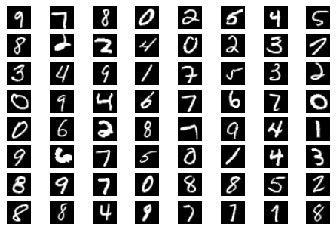

In [85]:
plot(data_mnist)

In [67]:
def denormalize(images):
    return 255 * (0.5 *images+0.5)

In [81]:
def plot_svhn(images):
    import numpy as np
    import matplotlib.pyplot as plt
    images = denormalize(images)
    figure = plt.figure()
    num_of_images = images.size(0)
    for index in range(num_of_images):
        plt.subplot(8, 8, index+1)
        plt.axis('off')
        plt.imshow(images[index].transpose(0,1).transpose(1,2).numpy().astype(np.uint8))
    
    plt.show()

In [82]:
for i, (data_svhn, label) in enumerate(svhn_loader_train):
    if (i==0):
        break

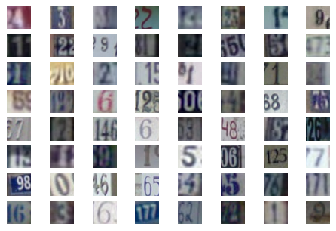

In [83]:
plot_svhn(data_svhn)

In [62]:
print(data_svhn.size())

torch.Size([64, 3, 32, 32])


In [64]:
sample = data_svhn[0]

In [65]:
torch.min(sample)

tensor(-0.8667)

In [66]:
torch.max(sample)

tensor(0.0510)